In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('MNRAS')
from scipy import linalg
from scipy.interpolate import interp1d

In [11]:
## make the fake data
data_loc = '/projects/hywu/cluster_sims/cluster_finding/data/emulator_data/base_c000_ph000/z0p300/model_hod000000/obs_q180_desy1/'
rp_rad = np.loadtxt(f'/projects/hywu/cluster_sims/cluster_finding/data/emulator_train/train/rp_rad.dat')
DS_data = []
for ibin in range(4):
    rp_in, DS_in = np.loadtxt(data_loc + f'DS_phys_noh_lam_bin_{ibin}.dat', unpack=True)
    DS_interp = interp1d(np.log(rp_in), np.log(DS_in))
    DS_data.extend(np.exp(DS_interp(np.log(rp_rad))))
DS_data = np.array(DS_data)

cov_loc = '/users/hywu/work/cluster-lensing-cov-public/examples/abacus_summit_analytic/'
z = [20, 30, 45, 60, 1000]

for ibin in range(4):    
    rp_cov = np.loadtxt(cov_loc + f'rp_phys_noh_0.2_0.35_{z[ibin]}_{z[ibin+1]}.dat')
    print('check radius difference', '%.2g'%max(abs(rp_cov[4:]/rp_rad - 1)))
    data = np.loadtxt(cov_loc + f'DeltaSigma_cov_combined_phys_noh_0.2_0.35_{z[ibin]}_{z[ibin+1]}.dat')
    data = data[4:,4:]
    if ibin == 0:
        cov_DS = data * 1.
    else:
        cov_DS = linalg.block_diag(cov_DS, data)
print('np.shape(cov_DS)', np.shape(cov_DS))
cov_DS_inv = linalg.inv(cov_DS)

x, x, NC_data = np.loadtxt(data_loc+'abundance.dat',unpack=True)
#cov_NC = np.diag(NC_data)
z = [20, 30, 45, 60, 1000]
cov_NC = []
for ibin in range(4):    
    counts, sv, bias, lnM_mean = np.loadtxt(cov_loc + f'counts_0.2_0.35_{z[ibin]}_{z[ibin+1]}.dat')
    cov_NC.append(counts + sv)
cov_NC = np.diag(cov_NC)
cov_NC_inv = linalg.inv(cov_NC)

data_vec = np.append(NC_data, DS_data)


from scipy.linalg import block_diag
cov_inv = block_diag(cov_NC_inv, cov_DS_inv)

print('np.shape(cov_inv)', np.shape(cov_inv))


np.savetxt('data/data_vector.dat', data_vec)
np.savetxt('data/cov_inv.dat', cov_inv)

check radius difference 0.029
check radius difference 0.029
check radius difference 0.029
check radius difference 0.029
np.shape(cov_DS) (44, 44)
np.shape(cov_inv) (48, 48)


In [12]:
# # check radius!
# rp_rad = np.loadtxt(f'/projects/hywu/cluster_sims/cluster_finding/data/emulator_train/train/rp_rad.dat')

# rp_cov = np.loadtxt(cov_loc + 'rp_hiMpc_0.35_0.5_60_1000.dat')[:,2] * a / h
# print((rp_cov[4:] - rp_rad)/rp_rad) #okay!

[-0.00745923 -0.00469346 -0.00076212  0.0043635   0.00868324  0.01321328
  0.01828802  0.02357081  0.02910686  0.03430163  0.04033175]


[0.09719282 0.0884178  0.0852003  0.08478761 0.09471643 0.11822221
 0.13250144 0.13495724 0.12960476 0.12848003 0.13714588]
[0.09939412 0.08641371 0.07990199 0.0766885  0.0796055  0.09568607
 0.11471501 0.12741606 0.13210338 0.13739409 0.15121139]
[0.13042781 0.10961063 0.09745391 0.09095769 0.08976123 0.10355677
 0.12782373 0.15080436 0.16626071 0.18032806 0.20136115]
[0.10564553 0.08370247 0.07176942 0.06455582 0.06042289 0.06543281
 0.08009415 0.09987311 0.11849109 0.13504817 0.16082414]
NC [0.01792168 0.03378382 0.06939167 0.12119871]


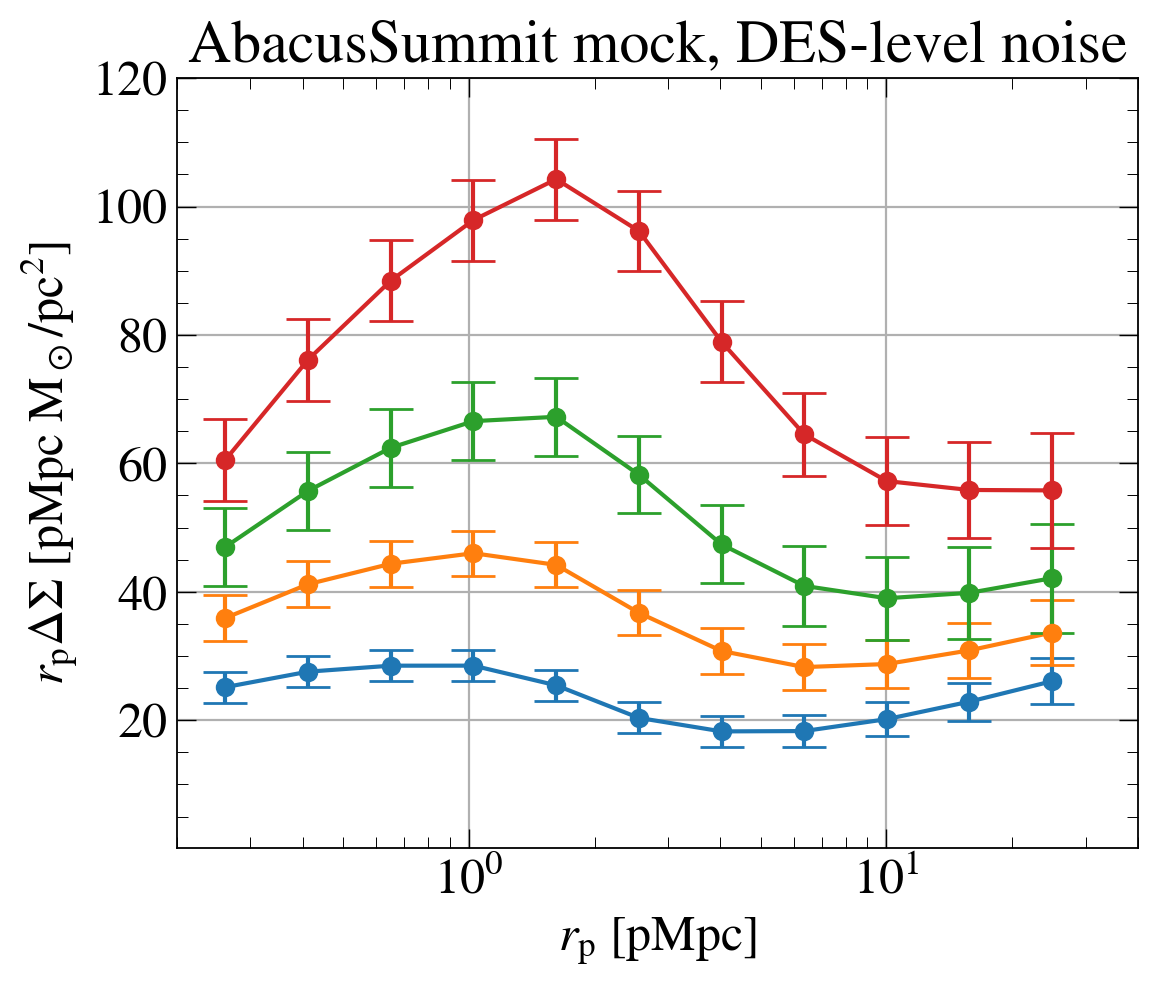

In [20]:
# plot the fake data and error bars
cov_loc = '/users/hywu/work/cluster-lensing-cov-public/examples/abacus_summit_analytic/'
z = [20, 30, 45, 60, 1000]
for ibin in range(4):
    rp_in, DS_in = np.loadtxt(data_loc + f'DS_phys_noh_lam_bin_{ibin}.dat', unpack=True)
    DS_interp = interp1d(np.log(rp_in), np.log(DS_in))
    DS_data = np.exp(DS_interp(np.log(rp_rad)))

    cov = np.loadtxt(cov_loc + f'DeltaSigma_cov_combined_phys_noh_0.2_0.35_{z[ibin]}_{z[ibin+1]}.dat')
    sig = np.sqrt(np.diag(cov))[4:]
    line = plt.plot(rp_rad, rp_rad*DS_data)
    co = line[0].get_c()
    plt.errorbar(rp_rad, rp_rad*DS_data, rp_rad*sig, 
                 label='data', c=co, marker='o', mec=co, ls='', capsize=8)#, np.diag(cov))
    plt.xscale('log')
    print(sig/DS_data)

plt.xlim(0.2, 40)
plt.ylim(0.10, 120)
plt.title('AbacusSummit mock, DES-level noise')

plt.xlabel(r'$r_{\rm p}~[{\rm pMpc}]$')
plt.ylabel(r'$r_{\rm p} \Delta\Sigma~[{\rm pMpc ~M_\odot/pc^2} ]$')
sig_NC = np.sqrt(np.diag(cov_NC))
print('NC',sig_NC/NC_data)
plt.savefig('../../plots/emulator/fid_lensing.pdf')